Extracting and Visualizing Stock Data

In [2]:
!pip install yfinance==0.2.38
!pip install pandas==2.2.2
!pip install nbformat

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
#Use yfinance to Extract Stock Data
tesla=yf.Ticker('TSLA')

In [8]:
#Using the ticker object and the function history extract stock information and save it in a dataframe
tesla_data=tesla.history(period='max')

In [9]:
#Using the reset_index(inplace=True) function on the tesla_data DataFrame and display the first five rows of the tesla_data dataframe 
tesla_data.reset_index(inplace=True)
tesla_data.head()

Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0

Use Webscraping to Extract Tesla Revenue Data

In [10]:
#Use the requests library to download the webpage
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data=requests.get(url).text

In [11]:
#Parse the html data using beautiful_soup
soup=BeautifulSoup(html_data,'html5lib')

In [36]:
#Discribe the cycle
tesla_revenue=pd.DataFrame(columns=['Date','Revenue'])
for table in soup.find_all('table'):
    if ('Tesla Quarterly Revenue' in table.find('tr').text):
        rows=table.find_all('tr')
        for row in rows:
            col=row.find_all('td')
            if col!=[]:
                date=col[0].text
                revenue = col[1].text.replace(',', '').replace('$', '')
                new_row = pd.DataFrame({'Date': [date], 'Revenue': [revenue]})
                tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)

tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

In [37]:
#Execute the following line to remove the comma and dollar sign from the Revenue column
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

In [38]:
#Execute the following lines to remove an null or empty strings in the Revenue column.
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [39]:
#Display the last 5 row of the tesla_revenue dataframe using the tail function
print(tesla_revenue.tail())

         Date Revenue
48 2010-09-30      31
49 2010-06-30      28
50 2010-03-31      21
52 2009-09-30      46
53 2009-06-30      27


Plot Tesla Stock Graph

In [47]:
#Define Graphing Function
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(
        rows=2, cols=1, shared_xaxes=True, 
        subplot_titles=("Historical Share Price", "Historical Revenue"), 
        vertical_spacing=0.3)
    
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    
    fig.add_trace(
        go.Scatter(
            x=pd.to_datetime(stock_data_specific.Date), 
            y=stock_data_specific.Close.astype("float"), 
            name="Share Price"), 
        row=1, col=1)
    
    fig.add_trace(
        go.Scatter(
            x=pd.to_datetime(revenue_data_specific.Date), 
            y=revenue_data_specific.Revenue.astype("float"), 
            name="Revenue"), 
        row=2, col=1)
    
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    fig.update_layout(
        showlegend=False,
        height=900,
        title=stock,
        xaxis_rangeslider_visible=True)
    
    fig.show()

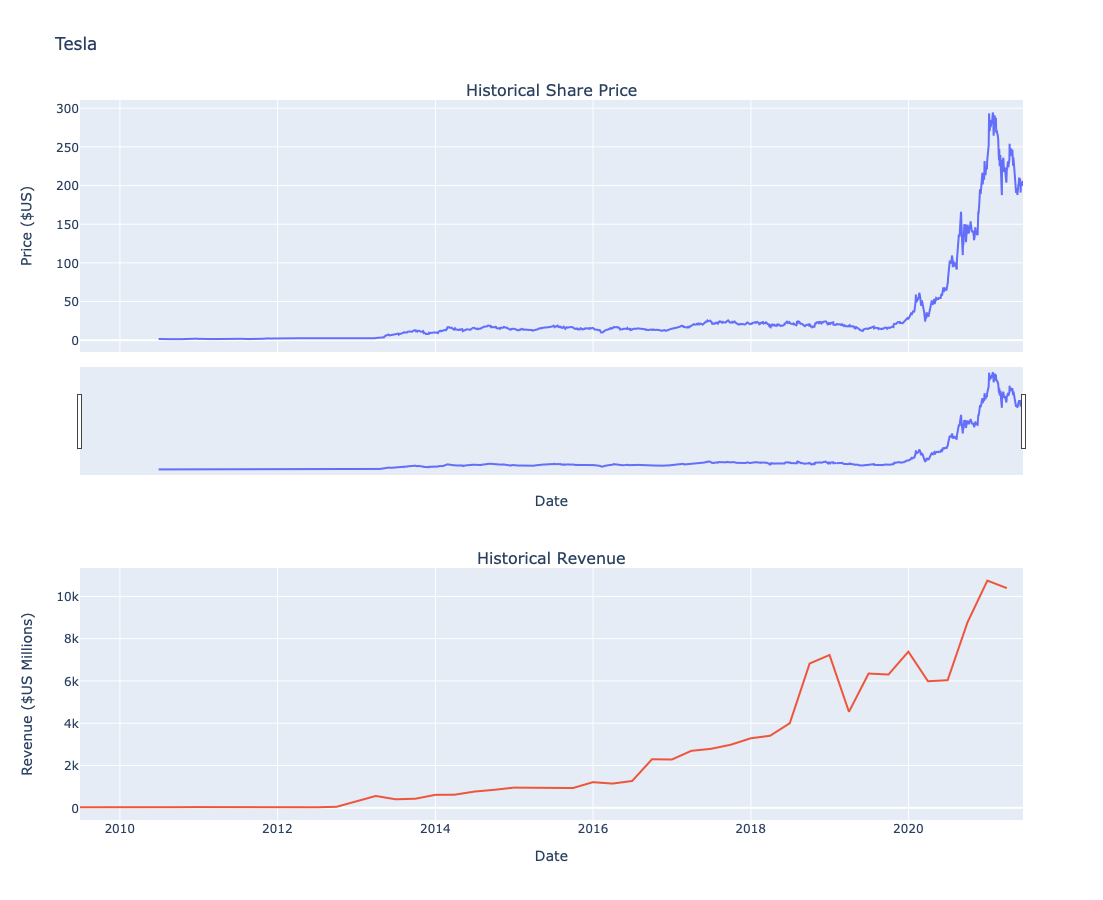

In [48]:
#Use the make_graph function to graph the Tesla Stock Data
make_graph(tesla_data, tesla_revenue, 'Tesla')